<a href="https://colab.research.google.com/github/Prakartt/Customer-Segmentation-and-Stock-market-prediction-for-portfolio-generation-/blob/main/SMOTE_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn

from scipy.stats import skew

In [ ]:
df = pd.read_csv("/content/train_data.csv")
df

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (13) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0.0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0.0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0.0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0.0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0.0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0.0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0.0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3.0,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0.0,unknown,no


In [ ]:
df.drop(['contact','day','month','duration','campaign','pdays','previous','poutcome','y'],axis = 1)

,age,job,marital,education,default,balance,housing,loan
0,58,management,married,tertiary,no,2143,yes,no
1,44,technician,single,secondary,no,29,yes,no
2,33,entrepreneur,married,secondary,no,2,yes,yes
3,47,blue-collar,married,unknown,no,1506,yes,no
4,33,unknown,single,unknown,no,1,no,no
...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no
45207,71,retired,divorced,primary,no,1729,no,no
45208,72,retired,married,secondary,no,5715,no,no
45209,57,blue-collar,married,secondary,no,668,no,no


In [ ]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0.0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0.0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0.0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0.0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0.0,unknown,no


In [ ]:
df.describe()


,age,balance,day,duration,campaign,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45210.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,0.580336
std,10.618762,3044.765829,8.322476,257.527812,3.098021,2.303465
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,275.000000


In [ ]:
df_org = df[["age", "job", 'marital', 'education', 'balance', 'housing', 'loan',]]
df_org

,age,job,marital,education,balance,housing,loan
0,58,management,married,tertiary,2143,yes,no
1,44,technician,single,secondary,29,yes,no
2,33,entrepreneur,married,secondary,2,yes,yes
3,47,blue-collar,married,unknown,1506,yes,no
4,33,unknown,single,unknown,1,no,no
...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,825,no,no
45207,71,retired,divorced,primary,1729,no,no
45208,72,retired,married,secondary,5715,no,no
45209,57,blue-collar,married,secondary,668,no,no


In [ ]:
df_org.corr(method = 'pearson')

,age,balance
age,1.000000,0.097783
balance,0.097783,1.000000


In [ ]:
df.corr(method = 'pearson')

,age,balance,day,duration,campaign,previous
age,1.000000,0.097783,-0.009120,-0.004648,0.004760,0.001282
balance,0.097783,1.000000,0.004503,0.021560,-0.014578,0.016672
day,-0.009120,0.004503,1.000000,-0.030206,0.162490,-0.051719
duration,-0.004648,0.021560,-0.030206,1.000000,-0.084570,0.001200
campaign,0.004760,-0.014578,0.162490,-0.084570,1.000000,-0.032859
previous,0.001282,0.016672,-0.051719,0.001200,-0.032859,1.000000


In [ ]:
df_org.balance.value_counts()

 0        3514
 1         195
 2         156
 4         139
 3         134
          ... 
-381         1
 4617        1
 20584       1
 4358        1
 16353       1
Name: balance, Length: 7168, dtype: int64

In [ ]:
df_org.job.value_counts()

blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64

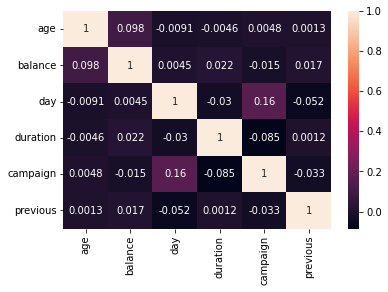

In [ ]:
sn.heatmap(df.corr(),annot=True)
plt.show()
#correlation strength
#age-balance : low positive correlation (0.098)
#duration-balance : low positive correlation (0.022)
# From the below heatmap we can observe that:
#None of the variables are dependent 
#Hence SMOTE analysis not possible

